In [7]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D
from keras.utils import plot_model
import os

CURR_DIR = "/content/drive/My Drive/input_analysis"

In [0]:
(X_train,Y_train),(X_test,Y_test)  = mnist.load_data()
print(X_train.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)


In [0]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
print(X_train.shape)
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
print(X_test.shape)
X_train = X_train/255
X_test  = X_test/255
X_train = X_train.astype('float')
X_test  = X_test.astype('float')
X_train[0].shape

(60000, 28, 28, 1)
(10000, 28, 28, 1)


(28, 28, 1)

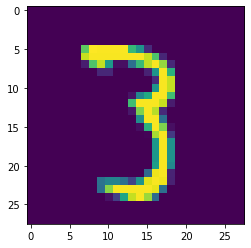

In [0]:
def show_img(img):
    img  = np.array(img,dtype='float')
    img = img.reshape((28,28))
    
    
    
    
    plt.imshow(img)
x = np.random.randint(0,X_test.shape[0])
show_img(X_train[x])

In [0]:
np.random.seed(0)
model = Sequential()
model.add(Conv2D(16, input_shape=(28,28,1), kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(X_train,Y_train,batch_size=32,epochs=5,validation_split=0.1,shuffle=True)




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 98,442
Trainable params: 98,442
Non-trainable params: 0
_______________________________________________

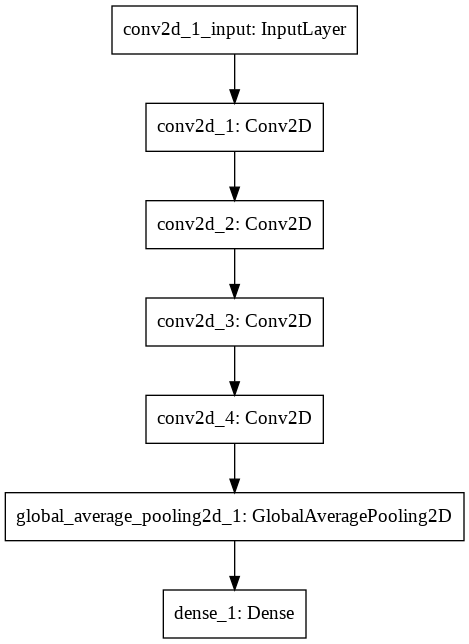

In [14]:
plot_model(model, to_file=os.path.join(CURR_DIR, "model.png"))

In [0]:
model.save(os.path.join(CURR_DIR, 'activation.h5'))

In [28]:
# model.evaluate(X_test, Y_test)
score = model.evaluate(X_test, Y_test, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])
model.summary()

Test score:  0.08905336153954267
Test accuracy:  0.9733
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 98,442
Trainable params: 98,442
Non-trainable para

## Start Trying to make CAM's

In [20]:
from keras.models import Model
import scipy as sp
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

(128, 10)

In [0]:
cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))

In [23]:
cam_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290

In [24]:
features,results = cam_model.predict(X_test)
features.shape

(10000, 28, 28, 128)

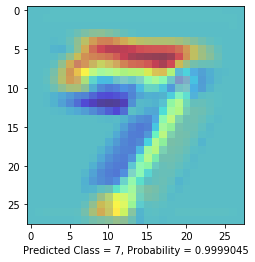

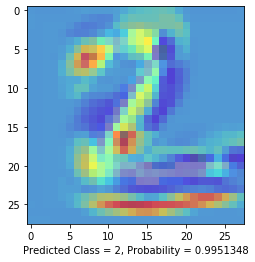

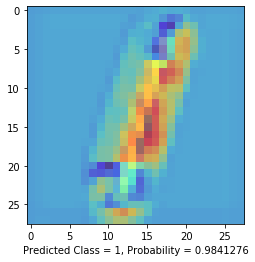

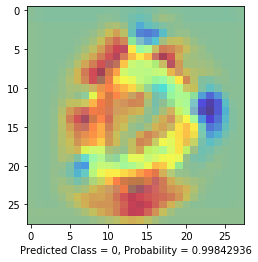

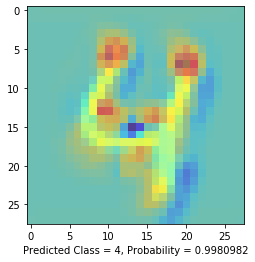

In [27]:
for idx in range(5):
  features_for_one_img = features[idx,:,:,:]
  pred = np.argmax(results[idx])
  cam_features = features_for_one_img
    
    
  plt.figure(facecolor='white')
  cam_weights = gap_weights[:,pred]
  cam_output  = np.dot(cam_features,cam_weights)

  buf = 'Predicted Class = ' +str( pred )+ ', Probability = ' + str(results[idx][pred])
  plt.xlabel(buf)

  plt.imshow(np.squeeze(X_test[idx],-1), alpha=0.5)

  plt.imshow(cam_output, cmap='jet', alpha=0.5)
  plt.show()